In [1]:
import requests

In [2]:
response = requests.get("https://online.boku.ac.at/BOKUonline/StudierendenStatistik.html")

In [3]:
response.status_code

200

In [4]:
response.raise_for_status()

In [5]:
response.content

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<!-- PAGEID:7009470 KurzBez:7050610 -->\n<HTML lang="de" id="id-page-7050610" class="fwk-pu app-studstat">\n<head>\n<meta http-equiv="Content-Type" name="" content="text/html; charset=UTF-8"><meta http-equiv="pragma" name="" content="no-cache"><meta http-equiv="" name="Author" content="University of Natural Resources and Life Sciences, Vienna">\n\n<title>Studierendenstatistik - BOKUonline - Universit\xc3\xa4t f\xc3\xbcr Bodenkultur Wien</title>\n<link rel="shortcut icon" href="/bokuprod/img/favicon.ico?20090224151815">\n<link rel="stylesheet" type="text/css" href="/bokuprod/css/css_sys_w_m.css?20160515193021">\n<link rel="stylesheet" type="text/css" href="/bokuprod/css/css_loc_w_m.css?20170613233425">\n<STYLE type="text/css">\n  A { text-decoration:underline;} \n  BODY { font-size:14px;background-image:url(/bokuprod/img/background_production_bokuprod.png?20150721225650);} \n</STYLE

In [6]:
# ordentlich_gemeldet = {"Inland Frauen": 4, "Inland Männer": 5}

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(response.content, "html.parser")
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<!-- PAGEID:7009470 KurzBez:7050610 -->
<html class="fwk-pu app-studstat" id="id-page-7050610" lang="de">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type" name=""/><meta content="no-cache" http-equiv="pragma" name=""/><meta content="University of Natural Resources and Life Sciences, Vienna" http-equiv="" name="Author"/>
<title>Studierendenstatistik - BOKUonline - Universität für Bodenkultur Wien</title>
<link href="/bokuprod/img/favicon.ico?20090224151815" rel="shortcut icon"/>
<link href="/bokuprod/css/css_sys_w_m.css?20160515193021" rel="stylesheet" type="text/css"/>
<link href="/bokuprod/css/css_loc_w_m.css?20170613233425" rel="stylesheet" type="text/css"/>
<style type="text/css">
  A { text-decoration:underline;} 
  BODY { font-size:14px;background-image:url(/bokuprod/img/background_production_bokuprod.png?20150721225650);} 
</style>
<script type="text/ja

In [9]:
len(soup.find_all("table"))

6

In [10]:
table = soup.find("table", class_="list")
table

<table class="list">
<tr>
<th class="tblHdr" colspan="7">Stand vom 04.06.2021</th>
</tr>
<tr>
<th class="tblHdr">Studierendenstatus</th>
<th class="tblHdr">Studienstatus</th>
<th class="tblHdr">Inland Frauen</th>
<th class="tblHdr">Inland Männer</th>
<th class="tblHdr">Ausland Frauen</th>
<th class="tblHdr">Ausland Männer</th>
<th class="tblHdr">gesamt</th>
</tr>
<tr class="z0">
<td align="left">Ordentlich</td>
<td align="left">gemeldet</td>
<td align="right">3851</td>
<td align="right">3683</td>
<td align="right">1251</td>
<td align="right">1053</td>
<td align="right">9838</td>
</tr>
<tr class="z1">
<td align="left">Ordentlich</td>
<td align="left">beurlaubt</td>
<td align="right">46</td>
<td align="right">39</td>
<td align="right">15</td>
<td align="right">4</td>
<td align="right">104</td>
</tr>
<tr class="z0">
<td align="left">Außerordentlich</td>
<td align="left">gemeldet</td>
<td align="right">123</td>
<td align="right">86</td>
<td align="right">49</td>
<td align="right">42</td>
<

In [12]:
table.contents[1].contents[1].get_text()

'Stand vom 04.06.2021'

In [13]:
table.find_all("th")

[<th class="tblHdr" colspan="7">Stand vom 04.06.2021</th>,
 <th class="tblHdr">Studierendenstatus</th>,
 <th class="tblHdr">Studienstatus</th>,
 <th class="tblHdr">Inland Frauen</th>,
 <th class="tblHdr">Inland Männer</th>,
 <th class="tblHdr">Ausland Frauen</th>,
 <th class="tblHdr">Ausland Männer</th>,
 <th class="tblHdr">gesamt</th>,
 <th class="tblSumGroupR" colspan="2"><b>gesamt:</b></th>,
 <th class="tblSumGroup" colspan="1"><b>4109</b></th>,
 <th class="tblSumGroup" colspan="1"><b>3809</b></th>,
 <th class="tblSumGroup" colspan="1"><b>1349</b></th>,
 <th class="tblSumGroup" colspan="1"><b>1101</b></th>,
 <th class="tblSumGroup" colspan="1"><b>10368</b></th>,
 <th class="tblHdr" colspan="7"> </th>]

In [18]:
rows = table.find_all("tr")

In [19]:
[row.find_all("th") for row in rows]

[[<th class="tblHdr" colspan="7">Stand vom 04.06.2021</th>],
 [<th class="tblHdr">Studierendenstatus</th>,
  <th class="tblHdr">Studienstatus</th>,
  <th class="tblHdr">Inland Frauen</th>,
  <th class="tblHdr">Inland Männer</th>,
  <th class="tblHdr">Ausland Frauen</th>,
  <th class="tblHdr">Ausland Männer</th>,
  <th class="tblHdr">gesamt</th>],
 [],
 [],
 [],
 [],
 [],
 [<th class="tblSumGroupR" colspan="2"><b>gesamt:</b></th>,
  <th class="tblSumGroup" colspan="1"><b>4109</b></th>,
  <th class="tblSumGroup" colspan="1"><b>3809</b></th>,
  <th class="tblSumGroup" colspan="1"><b>1349</b></th>,
  <th class="tblSumGroup" colspan="1"><b>1101</b></th>,
  <th class="tblSumGroup" colspan="1"><b>10368</b></th>],
 [<th class="tblHdr" colspan="7"> </th>]]

In [21]:
rows[1].find_all("th")

[<th class="tblHdr">Studierendenstatus</th>,
 <th class="tblHdr">Studienstatus</th>,
 <th class="tblHdr">Inland Frauen</th>,
 <th class="tblHdr">Inland Männer</th>,
 <th class="tblHdr">Ausland Frauen</th>,
 <th class="tblHdr">Ausland Männer</th>,
 <th class="tblHdr">gesamt</th>]

In [22]:
rows[-2].find_all("th")

[<th class="tblSumGroupR" colspan="2"><b>gesamt:</b></th>,
 <th class="tblSumGroup" colspan="1"><b>4109</b></th>,
 <th class="tblSumGroup" colspan="1"><b>3809</b></th>,
 <th class="tblSumGroup" colspan="1"><b>1349</b></th>,
 <th class="tblSumGroup" colspan="1"><b>1101</b></th>,
 <th class="tblSumGroup" colspan="1"><b>10368</b></th>]

In [23]:
rows[1].find_all("th")[2:]

[<th class="tblHdr">Inland Frauen</th>,
 <th class="tblHdr">Inland Männer</th>,
 <th class="tblHdr">Ausland Frauen</th>,
 <th class="tblHdr">Ausland Männer</th>,
 <th class="tblHdr">gesamt</th>]

In [28]:
rows[-2].find_all("th")[1:]

[<th class="tblSumGroup" colspan="1"><b>4109</b></th>,
 <th class="tblSumGroup" colspan="1"><b>3809</b></th>,
 <th class="tblSumGroup" colspan="1"><b>1349</b></th>,
 <th class="tblSumGroup" colspan="1"><b>1101</b></th>,
 <th class="tblSumGroup" colspan="1"><b>10368</b></th>]

In [64]:
# TODO: extraktion schlauer machen:
# * Nach Zeilen suchen (Bsp: "gesamt"), nicht hardkodieren

In [37]:
header_row = rows[1]
total_row = rows[-2]

In [44]:
def extract_values_from_ths(row, ignore_before=0):
    return [th.text for th in row.find_all("th")[ignore_before:]]

In [45]:
extract_values_from_ths(header_row)

['Studierendenstatus',
 'Studienstatus',
 'Inland Frauen',
 'Inland Männer',
 'Ausland Frauen',
 'Ausland Männer',
 'gesamt']

In [49]:
header = extract_values_from_ths(header_row, ignore_before=2)

In [83]:
totals = [int(value) for value in extract_values_from_ths(total_row, ignore_before=1)]
totals

[4109, 3809, 1349, 1101, 10368]

In [53]:
total_dict = {}
for i in range(len(header)):
    total_dict[header[i]] = totals[i]
total_dict

{'Inland Frauen': 4109,
 'Inland Männer': 3809,
 'Ausland Frauen': 1349,
 'Ausland Männer': 1101,
 'gesamt': 10368}

In [54]:
dict(zip(header, totals))

{'Inland Frauen': 4109,
 'Inland Männer': 3809,
 'Ausland Frauen': 1349,
 'Ausland Männer': 1101,
 'gesamt': 10368}

In [55]:
import pandas as pd

In [86]:
df = pd.DataFrame(total_dict, index=["gesamt"])
df

,Inland Frauen,Inland Männer,Ausland Frauen,Ausland Männer,gesamt
gesamt,4109,3809,1349,1101,10368


In [87]:
pd.DataFrame({"gesamt": totals}, index=header)

,gesamt
Inland Frauen,4109
Inland Männer,3809
Ausland Frauen,1349
Ausland Männer,1101
gesamt,10368


In [88]:
pd.DataFrame([totals], columns=header, index=["gesamt"])

,Inland Frauen,Inland Männer,Ausland Frauen,Ausland Männer,gesamt
gesamt,4109,3809,1349,1101,10368


In [78]:
df.to_excel("studierendenstatistik.xlsx")

<AxesSubplot:>

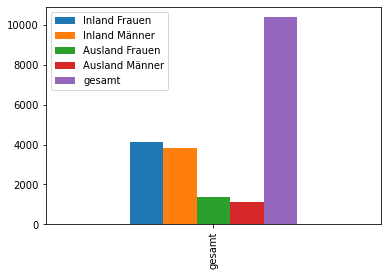

In [91]:
df.plot.bar()

<AxesSubplot:>

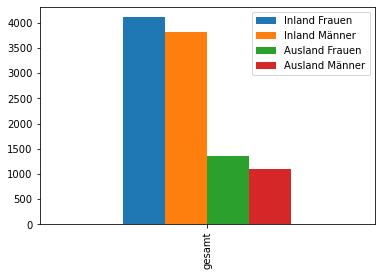

In [95]:
df.drop(columns=["gesamt"]).plot.bar()

In [99]:
df['Inland Frauen'] / df['Inland Männer']

gesamt    1.078761
dtype: float64

In [100]:
df['Ausland Frauen'] / df['Ausland Männer']

gesamt    1.22525
dtype: float64

In [101]:
# Höherer Frauenanteil bei Ausland. Liegt das nur an höherer Beurlaubung und mehr Mitbelegung?